In [1]:
# Bibliotecas utilizadas e últimos 3 dígitos da matrícula

import matplotlib.pyplot as plt
import numpy as np

mat1 = [6, 1, 1]
origem = (0, 0)

def printa_mat(mat):
	for i in range(len(mat)):
		for j in range(len(mat[i])):
			print(f"{mat[i][j]}", end=" ")
		print()
	print()
	return

def soma_mat(a, b):
	s = []
	for i in range(len(a)):
		s.append([])
		for j in range(len(a)):
			s[i].append(0)

	for i in range(len(a)):
		for j in range(len(a[i])):
			s[i][j] = (a[i][j] + b[i][j])

	return s

def multiplica_mat(a, b):
	m = []

	for i in range(len(a)):
		m.append([])
		for _ in range(len(b[0])):
			m[i].append(0)

	for i in range(len(a)):
		for j in range(len(b[0])):
			for k in range(len(a[i])):
				m[i][j] += a[j][k] * b[k][j]

	return m


Intervalo: [-7.703703703703704, -3.7037037037037037]: (-7.703703703703704, -58.822516892750116) e (-3.7037037037037037, 11.198882284204643)
Erro da 2 iteração: 0.09850397
Raiz estimada da 3 iteração: -5.11602708
1 pontos achados:
[[-5.451295969524394], [0.06564623919798862]]


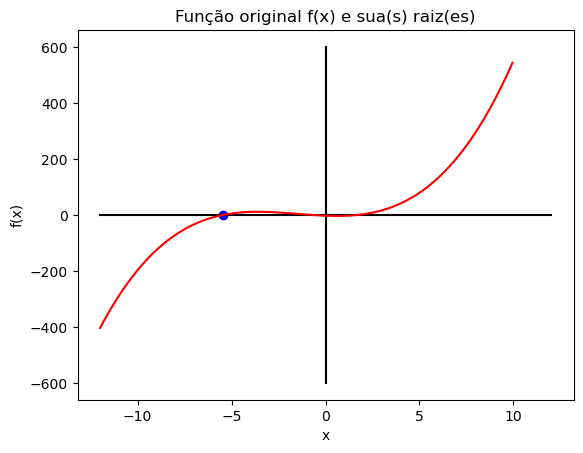

In [2]:
# Questão 1

# f(x) = d + c * x + b * x^2 + a * x^3
def funcao_1(x):
	return -2.8 + (-2.6 * x) + (1.8 * (x ** 2)) + (0.4 * (x ** 3))

def falsa_posicao(inferior, superior):
	return superior - ((funcao_1(superior) * (inferior - superior)) / (funcao_1(inferior) - funcao_1(superior)))

k = 8 / 27
# Método da Falsa Posição

inferior = k - 8
superior = k - 4

erro_atual = 1
iteracao = 1
raiz = 0

criterio_parada = 0.001

raizes = [[], []]
valores = []
pontos = []

meio = falsa_posicao(inferior, superior)
meio_anterior = 0

y_inferior = funcao_1(inferior)
y_meio = funcao_1(meio)
y_superior = funcao_1(superior)

retas = []

# O método da falsa posição é um método intervalar.
# Ela determina a próxima posição não através da divisão ao meio,
# mas ligando as extremidades com uma linha reta e determinando a localização onde a linha reta intercepta o eixo x.
# O valor de xr (raíz estimada), substitui qualquer uma das duas estimativas iniciais
# e produz um valor de funçao com o mesmo sinal que f(xr).

print(f"Intervalo: [{inferior}, {superior}]: ({inferior}, {y_inferior}) e ({superior}, {y_superior})")
while (inferior > meio and inferior < superior):
	print(f"Intervalo: [{inferior}, {superior}]: ({inferior}, {y_inferior}) e ({superior}, {y_superior})")
	print(f"Falsa Posicao: ({falsa_posicao(inferior, superior)}, {funcao(falsa_posicao(inferior, superior))})")
	inferior = (inferior + superior) / 2 # Procura próximo valor com reta atravessando o eixo x
	meio = falsa_posicao(inferior, superior)
	retas = [(meio, superior), (funcao(meio), funcao(superior))] # Última reta encontrada para plotar no grafico

while (erro_atual > criterio_parada): # Procura pela raiz
	meio = falsa_posicao(inferior, superior)

	y_inferior = funcao_1(inferior)
	y_meio = funcao_1(meio)
	y_superior = funcao_1(superior)

	erro_atual = np.abs((meio - meio_anterior) / meio)

	if (iteracao == 2):
		print(f"Erro da {iteracao} iteração: {erro_atual:2.8f}")
	elif (iteracao == 3):
		print(f"Raiz estimada da {iteracao} iteração: {meio:2.8f}")

	# Houve mudança de sinal entre o inicio e o meio
	if ((y_inferior * y_meio) < 0):
		superior = meio
	# Houve mudança de sinal entre o meio e o fim
	else:
		inferior = meio
	
	meio_anterior = meio
	iteracao += 1

i = -12
while (i <= 10):
	valores.append(i)
	pontos.append(funcao_1(i))
	i += 0.05

raizes[0].append(meio)
raizes[1].append(y_meio)

print(f"{len(raizes[0])} pontos achados:")
print(raizes)

plt.plot(raizes[0], raizes[1], color='blue', marker='o') # Pontos das Raízes
plt.plot((-12, 12), origem, color='black') # Reta do eixo X
plt.plot(origem, (-600, 600), color='black') # Reta do eixo Y
# plt.plot(tuple(retas[0]), tuple(retas[1]), color='green') # Reta do eixo Y
plt.plot(valores, pontos, color='red') # Função original

plt.title("Função original f(x) e sua(s) raiz(es)")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.show()

# Questão 1
# O erro da 2ª iteração: 0.09850397
# A raiz estimada na 3ª iteração: -5.11602708
# A raiz final: -5.451295969524394

Raiz estimada da 2 iteração: -5.45129597
Erro da 3 iteração: 0.09528388
1 pontos achados:
[[1.7075246988094812], [1.9069726686637978e-07]]


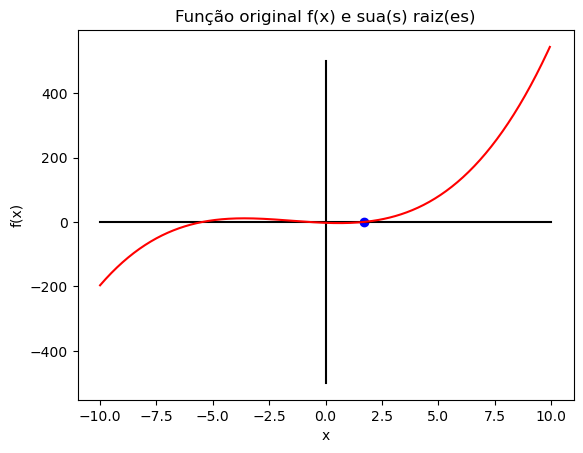

In [3]:
# Questão 2

# f(x) = a * x^3 + b * x^2 + c * x + d
def funcao_2(x):
	return (0.4 * (x ** 3)) + (1.8 * (x ** 2)) + (-2.6 * x) - 2.8

def derivada_2(anterior, atual):
	return (funcao_2(anterior) - funcao_2(atual)) / (anterior - atual)

# Método da secante
k = (8 / 27) / 2

erro_atual = 1
iteracao = 1
raiz = 0

aproximacao = k + 2
pertubacao = 0.01

atual = aproximacao
anterior = 1

criterio_parada = 0.0001

raizes = [[], []]
valores = []
pontos = []

while(erro_atual > criterio_parada):
	numerador = (pertubacao * anterior * funcao_2(anterior))
	denominador = (funcao_2(anterior + pertubacao*anterior) - funcao_2(anterior))
	atual = anterior - (numerador / denominador)

	erro_atual = np.abs((atual - anterior) / atual)

	if (iteracao == 2):
		print(f"Raiz estimada da {iteracao} iteração: {meio:2.8f}")
	elif (iteracao == 3):
		print(f"Erro da {iteracao} iteração: {erro_atual:2.8f}")

	anterior = atual
	iteracao += 1

i = -10
while (i <= 10):
	valores.append(i)
	pontos.append(funcao_2(i))
	i += 0.05

raizes[0].append(atual)
raizes[1].append(funcao_2(atual))

print(f"{len(raizes[0])} pontos achados:")
print(raizes)

plt.plot(raizes[0], raizes[1], color='blue', marker='o') # Pontos das Raízes
plt.plot((-10, 10), origem, color='black') # Reta do eixo X
plt.plot(origem, (-500, 500), color='black') # Reta do eixo Y
# plt.plot(tuple(retas[0]), tuple(retas[1]), color='green') # Reta do eixo Y
plt.plot(valores, pontos, color='red') # Função original

plt.title("Função original f(x) e sua(s) raiz(es)")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.show()

# Questão 2
# O erro da 3ª iteração: 0.09528388
# A raiz estimada na 2ª iteração: -5.45129597
# A raiz final: 1.7075246988094812

0.1111111111111111 0.6666666666666666
Razão Aurea: 1.618034	Diferencial: 2.073847
Inicio: 0.311111	Fim: 3.666667
Soma de erros: 50.42412022113168
Iteracoes necessárias: 19
1 pontos achados:
[[2.589399606938368], [1.8735806215029243]]


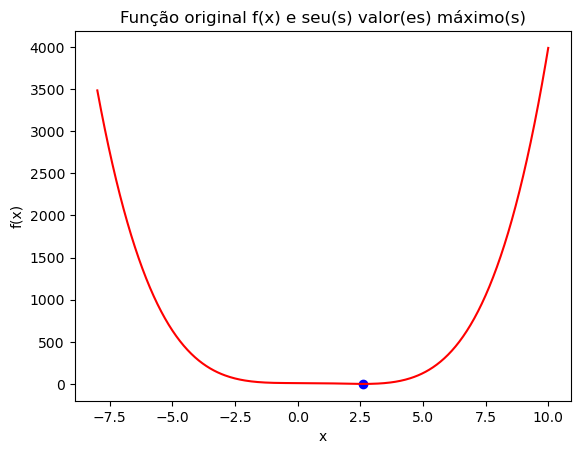

In [4]:
# Questão 3

# f(x) = 12 - 0.4 * x - 0.2 * x^2 - 2 * x^3 + 0.6 * x^4
def funcao_3(x):
	return 12 + (-0.4 * x) + (-0.2 * (x ** 2)) + (-2 * (x ** 3)) + (0.6 * (x ** 4))

# Busca da razão áurea
k1 = mat1[-1] / 9
k2 = mat1[0] / 9

print(k1, k2)

inicio = k1 + 0.2
fim = k2 + 3
criterio_parada = 0.005

soma_erros = 0
iteracao = 1

x_inicio, x_fim, y_inicio, y_fim = (0, 0, 0, 0)

razao_aurea = (1 + (5 ** 0.5)) / 2
diferencial = (razao_aurea - 1) * (fim - inicio)
x_opt = 1
erro = (2 - razao_aurea) * abs((fim - inicio) / x_opt) * 100

pontos_criticos = [[], []]

print(f"Razão Aurea: {razao_aurea:6f}\tDiferencial: {diferencial:6f}")
print(f"Inicio: {inicio:6f}\tFim: {fim:6f}")

pontos_criticos = [[], []]
valores = []
pontos = []

# Utiliza-se o critério de parada e o contador máximo como mecanismos de se obter
# um resultado satisfatório para parar de procurar os pontos críticos
while(erro > criterio_parada):
# while(iteracao < 22):
    diferencial = (razao_aurea - 1) * (fim - inicio)

    x_inicio = inicio + diferencial
    x_fim = fim - diferencial

    y_inicio = funcao_3(x_inicio)
    y_fim = funcao_3(x_fim)

    erro = (2 - razao_aurea) * abs((x_fim - x_inicio) / x_opt) * 100

    #  Trocados inicio e fim durante a prova!!!
    # Achou y_inicio mínimo
    if (y_inicio < y_fim):
        x_opt = x_inicio
        inicio = x_fim
    # Achou y_fim mínimo
    elif (y_fim < y_inicio):
        x_opt = x_fim
        fim = x_inicio
    else:
        print(f"Pontos iguais")
        break

    soma_erros += erro
    iteracao += 1

print(f"Soma de erros: {soma_erros}")
print(f"Iteracoes necessárias: {iteracao}")

pontos_criticos[0].append(x_inicio)
pontos_criticos[1].append(y_inicio)

i = -8
while (i <= 10):
    valores.append(i)
    pontos.append(funcao_3(i))
    i += 0.05

print(f"{len(pontos_criticos[0])} pontos achados:")
print(pontos_criticos)

plt.plot(pontos_criticos[0], pontos_criticos[1], color='blue', marker='o') # Pontos das Raízes
# plt.plot((-8.5, 10), origem, color='black') # Reta do eixo X
# plt.plot(origem, (-50, 4500), color='black') # Reta do eixo Y
# plt.plot(tuple(retas[0]), tuple(retas[1]), color='green') # Reta do eixo Y
plt.plot(valores, pontos, color='red') # Função original

plt.title("Função original f(x) e seu(s) valor(es) máximo(s)")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.show()

# Questão 3
# A soma dos erros de todas as iterações: 250.802433107668
# O número de iterações necessárias: 44
# A raiz final: 0.3111958409436414

In [5]:
# Questão 4

c = [
	[0, (-1 / 1), (-2 / 1)],
	[(-2 / 4), 0, (3 / 4)],
	[(3 / 5), (6 / 5), 0]
]

g = [(9 / 1), (1 / 4), 0]

# Método de Gauss Seidel
x = np.transpose(mat1)
x_ant = [x[i] for i in range(len(x))] # cópia de 'x'

erro_tolerado = 0.001
erro = 1

iteracao = 0
soma_erros = 0

while (erro > erro_tolerado):
	x_ant = [x[i] for i in range(len(x))]

	erro_maximo = 0
	x = np.matmul(g, c)

	print(x_ant)
	print(x)

	for i in range(len(x)):
		# erro_atual = abs(x[i] - x_ant[i])
		erro_atual = abs((x[i] - x_ant[i]) / x[i])
		print(f"Erro Atual: {erro_atual}")
		erro_maximo = max(erro_maximo, erro_atual)

	erro = abs(erro_maximo / max(x))

	# erro_atual 

	if (iteracao == 2):
		print(f"Solução da {iteracao} iteração: {x}")

	print(erro)

	iteracao += 1
	soma_erros += erro

print(f"Solução da {iteracao} iteração: {x}")
print(f"Solução final: {x}")
print(f"Soma de erros: {soma_erros}")

# Questão 4
# A solução da 2ª iteração: 
# A solução final:
# A soma dos erros de todas as iterações: 


[np.int64(6), np.int64(1), np.int64(1)]
[ -0.125   -9.     -17.8125]
Erro Atual: 49.0
Erro Atual: 1.1111111111111112
Erro Atual: 1.056140350877193
392.0
[np.float64(-0.125), np.float64(-9.0), np.float64(-17.8125)]
[ -0.125   -9.     -17.8125]
Erro Atual: 0.0
Erro Atual: 0.0
Erro Atual: 0.0
0.0
Solução da 2 iteração: [ -0.125   -9.     -17.8125]
Solução final: [ -0.125   -9.     -17.8125]
Soma de erros: 392.0


n: 8
Soma X: 1875
Soma Y: 2970
Soma X^2: 523125
Soma X Y: 843000
numerador = 8 * 843000 - 1875 * 2970 = 1175250


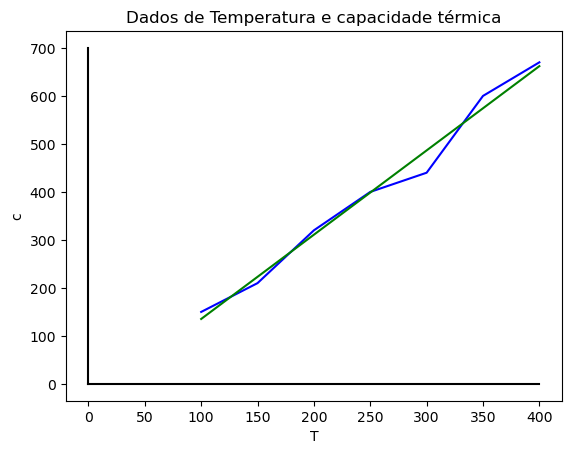

Coeficiente angular: 1.7557422969187675
Coeficiente r^2: 0.9871483205538829
Coeficiente linear: -40.25210084033614
y, para x = 701: 1191.5103976202736


In [6]:
# Questão 5
x = [100, 125, 150, 200, 250, 300, 350, 400]
y = [150, 180, 210, 320, 400, 440, 600, 670]
reta = [0 for _ in range(len(x))]

angular = 0 # a_1
r_2 = 0
linear = 0 # a_0

# Técnica dos Mínimos Quadrados
soma_x_y = (sum([x[i]*y[i] for i in range(len(x))]))
soma_x = sum(x)
soma_y = sum(y)
soma_x_quadrado = sum([x[i]**2 for i in range(len(x))])

n = len(x)
media_x = np.mean(x)
media_y = np.mean(y)

print(f"n: {n}")
print(f"Soma X: {soma_x}")
print(f"Soma Y: {soma_y}")
print(f"Soma X^2: {soma_x_quadrado}")
print(f"Soma X Y: {soma_x_y}")

numerador = (n * soma_x_y) - (soma_x * soma_y)

print(f"numerador = {n} * {soma_x_y} - {soma_x} * {soma_y} = {numerador}")

angular = ((n * soma_x_y) - (soma_x * soma_y)) / ((n * soma_x_quadrado) - (soma_x ** 2))
linear = media_y - (angular * media_x)

soma_t = 0
soma_r = 0

for i in range(0, n):
	soma_r += (y[i] - linear - angular * x[i]) ** 2
	soma_t += (y[i] - media_y) ** 2
	reta[i] = linear + angular * x[i]

r_2 = (soma_t - soma_r) / (soma_t)

# plt.plot(pontos_criticos[0], pontos_criticos[1], color='blue', marker='o') # Pontos das Raízes
plt.plot((0, 400), origem, color='black') # Reta do eixo X
plt.plot(origem, (00, 700), color='black') # Reta do eixo Y
# plt.plot(tuple(retas[0]), tuple(retas[1]), color='green') # Reta do eixo Y
plt.plot(x, y, color='blue') # Reta
plt.plot(x, reta, color='green') # Reta

plt.title("Dados de Temperatura e capacidade térmica")
plt.xlabel("T")
plt.ylabel("c")

plt.show()

print(f"Coeficiente angular: {angular}")
print(f"Coeficiente r^2: {r_2}")
print(f"Coeficiente linear: {linear}")
print(f"y, para x = 701: {linear + angular * 701 + r_2}")

# Questão 5
# Coeficiente angular: -11.506605504587156
# Coeficiente r^2: -26.812099485818162
# Coeficiente linear: 1787.8648318042815